In [1]:
import numpy as np
from PIL import Image
from tqdm import tqdm
import numba
import matplotlib.pyplot as plt

%config IPCompleter.greedy=True

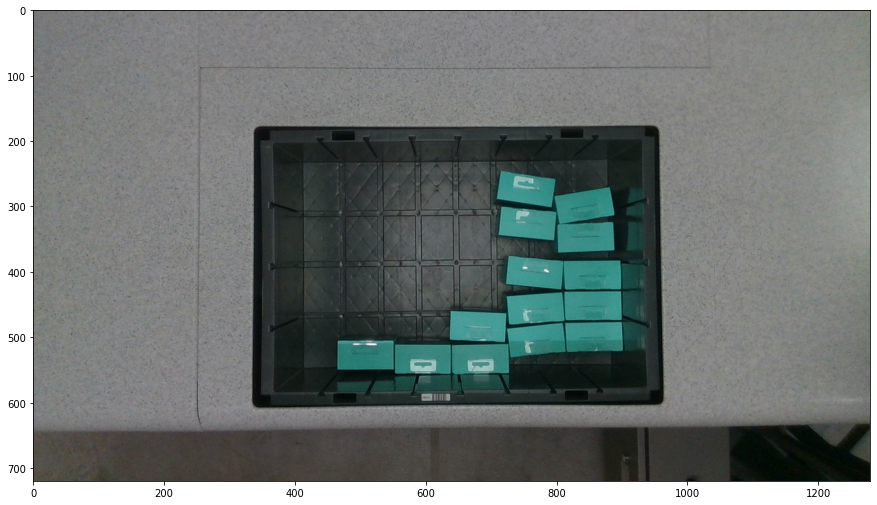

In [2]:
color_img = np.array(Image.open('../images/color_production_3.png'))
plt.figure(figsize=(15, 10))
plt.imshow(color_img)

# Augmentation

https://github.com/albumentations-team/albumentations

* RandomCrop
* ColorJitter
* GaussianBlur
* RandomBrightnessContrast
* HueSaturationValue

In [3]:
import albumentations as A
import cv2

# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=1000, height=650),
    A.ColorJitter(
        brightness=0.2, contrast=0.2, 
        saturation=0.2, hue=0.2, always_apply=False, p=0.5
    ),
    A.RandomBrightnessContrast(
        brightness_limit=0.2, 
        contrast_limit=0.2, brightness_by_max=True, 
        always_apply=False, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=20, sat_shift_limit=30, 
        val_shift_limit=20, always_apply=False, p=0.5
    ),
    A.GaussianBlur(blur_limit=(3, 5), sigma_limit=0, always_apply=False, p=0.5),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread('../images/color_production_3.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image)
transformed_image = transformed["image"]

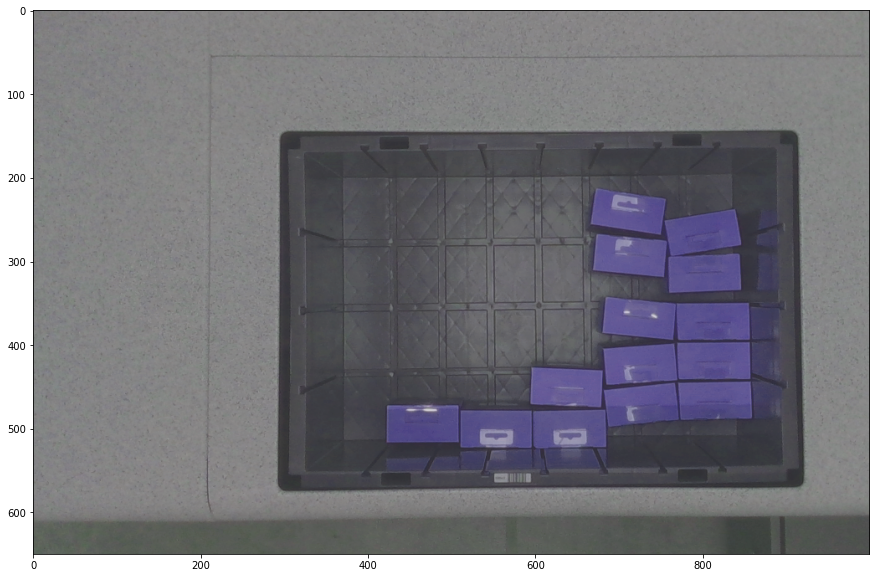

In [4]:
plt.figure(figsize=(15, 10))
plt.imshow(transformed_image)

# Transform image and mask

In [25]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=900, height=650),
    A.ColorJitter(
        brightness=0.2, contrast=0.2, 
        saturation=0.2, hue=0.2, always_apply=False, p=0.5
    ),
    A.RandomBrightnessContrast(
        brightness_limit=0.2, 
        contrast_limit=0.2, brightness_by_max=True, 
        always_apply=False, p=0.5
    ),
    A.HueSaturationValue(
        hue_shift_limit=20, sat_shift_limit=30, 
        val_shift_limit=20, always_apply=False, p=0.5
    ),
    A.GaussianBlur(blur_limit=(3, 5), sigma_limit=0, always_apply=False, p=0.5),
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread('../images/color_production_2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread('../images/depth_production_2.png')

# Augment an image
transformed = transform(image=image, mask=mask)
transformed_image = transformed["image"]
transformed_mask = transformed["mask"]

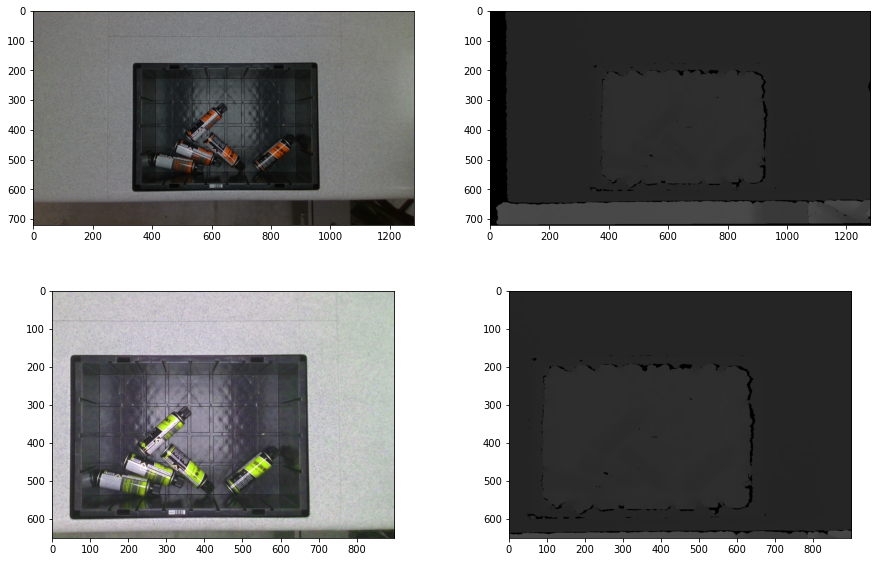

In [26]:
f, axes = plt.subplots(2,2)
f.set_figheight(10)
f.set_figwidth(15)
axes[0, 0].imshow(image)
axes[0, 1].imshow(mask)
axes[1, 0].imshow(transformed_image)
axes[1, 1].imshow(transformed_mask)

# Check if transformations also affect depth

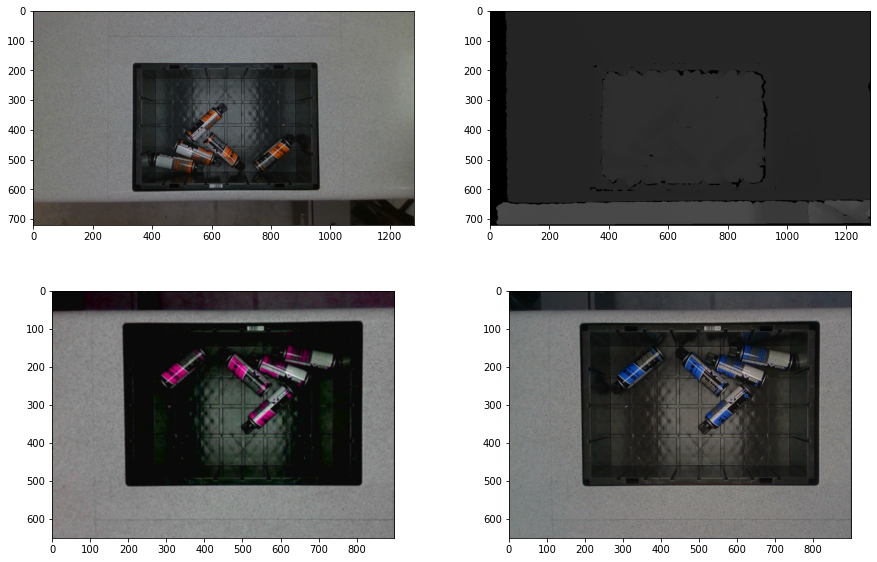

In [39]:
# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomCrop(width=900, height=650),
    A.ColorJitter(
        brightness=0.2, contrast=0.2, 
        saturation=0.2, hue=0.2, always_apply=False, p=1
    ),
    A.RandomBrightnessContrast(
        brightness_limit=0.2, 
        contrast_limit=0.2, brightness_by_max=True, 
        always_apply=False, p=1
    ),
    A.HueSaturationValue(
        hue_shift_limit=20, sat_shift_limit=30, 
        val_shift_limit=20, always_apply=False, p=1
    ),
    A.GaussianBlur(blur_limit=(3, 5), sigma_limit=0, always_apply=False, p=1),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5)
])

# Read an image with OpenCV and convert it to the RGB colorspace
image = cv2.imread('../images/color_production_2.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread('../images/depth_production_2.png')


image2 = cv2.imread('../images/color_production_2.png')
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Augment an image
transformed = transform(image=image, mask=image2)
transformed_image = transformed["image"]
transformed_mask = transformed["mask"]

f, axes = plt.subplots(2,2)
f.set_figheight(10)
f.set_figwidth(15)
axes[0, 0].imshow(image)
axes[0, 1].imshow(mask)
axes[1, 0].imshow(transformed_image)
axes[1, 1].imshow(transformed_mask)